<a href="https://colab.research.google.com/github/Parths131/traffic-forecasting/blob/main/sarima_lucknow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving blr-traffic-data.csv to blr-traffic-data.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
path = '/content/blr-traffic-data.csv'
df = pd.read_csv(path)

In [ ]:
order = (1,1,1)
seasonal_order = (1,1,1,12)

In [ ]:
df_excluded = df[['Month','luc1']]
df_excluded = df_excluded[33:92]

In [ ]:
df_excluded

,Month,luc1
33,Jan-14,"1,41,142"
34,Feb-14,"1,58,771"
35,Mar-14,"1,67,049"
36,Apr-14,"1,56,016"
37,May-14,"1,81,004"
38,Jun-14,"1,95,139"
39,Jul-14,"1,50,703"
40,Aug-14,"1,71,273"
41,Sep-14,"1,59,816"
42,Oct-14,"1,78,228"


In [ ]:
df_excluded['Month'] = pd.to_datetime(df_excluded['Month'], format='%b-%y')

In [ ]:
df_excluded['luc1'] = df_excluded['luc1'].str.replace(',', '').astype(int)

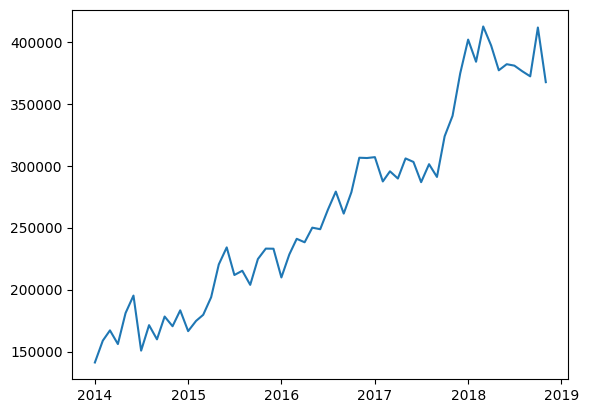

In [ ]:
plt.plot(df_excluded['Month'], df_excluded['luc1'])

In [ ]:
adf_test = adfuller(df_excluded['luc1'].diff(12).dropna())

print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -2.760258361456229
p-value: 0.06417863741043699


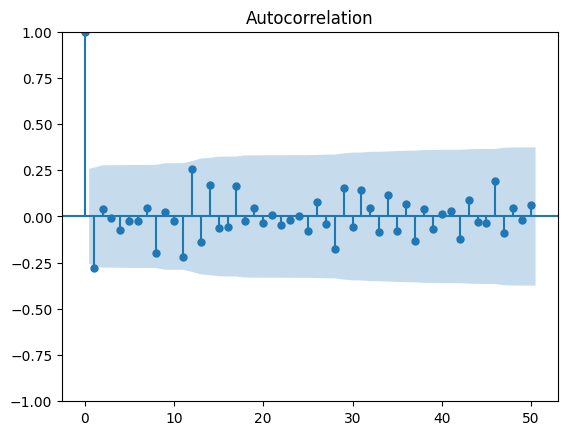

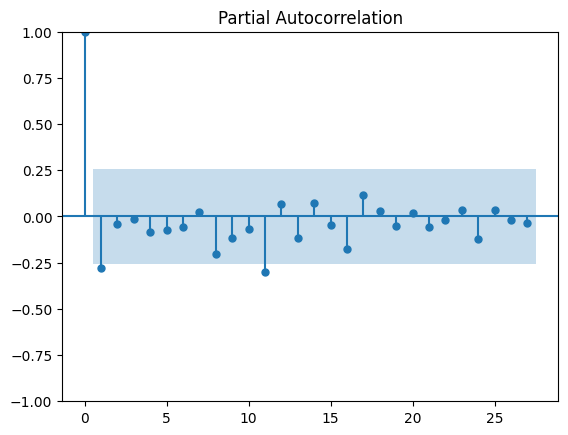

In [ ]:
acf_original = plot_acf(df_excluded['luc1'].diff().dropna(), lags=50)

pacf_original = plot_pacf(df_excluded['luc1'].diff().dropna(), lags=27)

In [ ]:
test_start = datetime(2018, 6, 1)
df_train = df_excluded[(df_excluded['Month'] < test_start)]

In [ ]:
df_test = df_excluded[(df_excluded['Month'] >= test_start)]

In [ ]:
testing_range = pd.date_range(start=datetime(2018, 6, 1), end=datetime(2019, 11, 1), freq='MS')

model = SARIMAX(df_train['luc1'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

testing = model_fit.forecast(steps=len(testing_range))

testing_df = pd.DataFrame({'Month': testing_range, 'luc1': testing})

print(testing_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


        Month           luc1
53 2018-06-01  377717.057519
54 2018-07-01  364375.125868
55 2018-08-01  377742.910717
56 2018-09-01  368671.867795
57 2018-10-01  395774.870088
58 2018-11-01  410119.851495
59 2018-12-01  435247.380349
60 2019-01-01  458555.357657
61 2019-02-01  447878.219559
62 2019-03-01  469348.358492
63 2019-04-01  458903.531541
64 2019-05-01  450292.474699
65 2019-06-01  452221.616519
66 2019-07-01  439909.213277
67 2019-08-01  452391.390951
68 2019-09-01  443623.159562
69 2019-10-01  467754.452393
70 2019-11-01  480867.314418


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
testing_df = testing_df.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
rmse = np.sqrt(np.mean((df_test['luc1'] - testing_df['luc1']) ** 2))

mae = np.mean(np.abs(df_test['luc1'] - testing_df['luc1']))

rmse, mae

(19883.82012374123, 14006.306823647077)

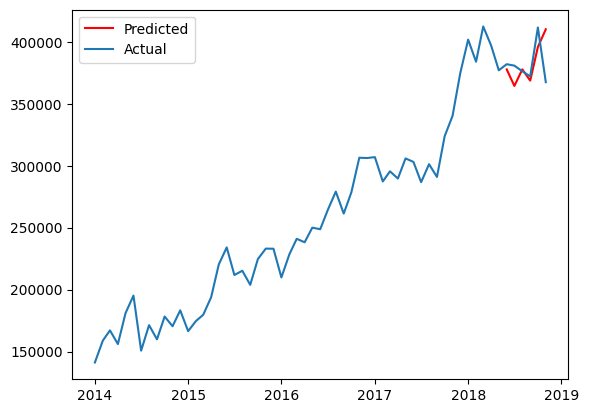

In [ ]:
plt.plot(testing_df['Month'][:6], testing_df['luc1'][:6], label='Predicted', color='red')
plt.plot(df_excluded['Month'], df_excluded['luc1'], label='Actual')
plt.legend()

In [ ]:
forecast_range = pd.date_range(start=datetime(2020, 3, 1), end=datetime(2049, 12, 31), freq='MS')

model = SARIMAX(df_excluded['luc1'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(forecast_range))

predictions_df = pd.DataFrame({'Month': forecast_range, 'luc1': predictions})

print(predictions_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


         Month          luc1
92  2020-03-01  3.975753e+05
93  2020-04-01  4.251063e+05
94  2020-05-01  4.182384e+05
95  2020-06-01  4.424002e+05
96  2020-07-01  4.345343e+05
..         ...           ...
445 2049-08-01  2.307855e+06
446 2049-09-01  2.312980e+06
447 2049-10-01  2.306441e+06
448 2049-11-01  2.311919e+06
449 2049-12-01  2.305516e+06

[358 rows x 2 columns]


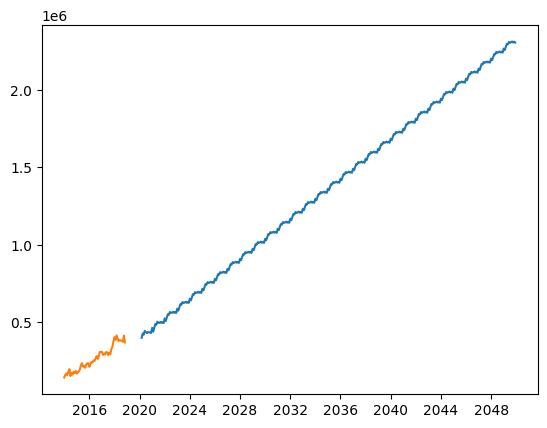

In [ ]:
plt.plot(predictions_df['Month'], predictions_df['luc1'], label='Predicted')
plt.plot(df_excluded['Month'], df_excluded['luc1'], label='Predicted')

In [ ]:
predictions_df

,Month,luc1
92,2020-03-01,3.975753e+05
93,2020-04-01,4.251063e+05
94,2020-05-01,4.182384e+05
95,2020-06-01,4.424002e+05
96,2020-07-01,4.345343e+05
...,...,...
445,2049-08-01,2.307855e+06
446,2049-09-01,2.312980e+06
447,2049-10-01,2.306441e+06
448,2049-11-01,2.311919e+06
